<a href="https://colab.research.google.com/github/Rakshaksa/Internpe_AIML_internship/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load Dataset

In [2]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Select Required Columns

In [12]:
df = df[["GrLivArea", "BedroomAbvGr", "OverallQual",
         "GarageCars", "TotalBsmtSF", "FullBath",
         "YearBuilt", "SalePrice"]]

df = df.dropna()
df.head()

,GrLivArea,BedroomAbvGr,OverallQual,GarageCars,TotalBsmtSF,FullBath,YearBuilt,SalePrice
0,1710,3,7,2,856,2,2003,208500
1,1262,3,6,2,1262,2,1976,181500
2,1786,3,7,2,920,2,2001,223500
3,1717,3,7,3,756,1,1915,140000
4,2198,4,8,3,1145,2,2000,250000


# Define Features (X) and Target (y)

In [4]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

# Split Data (Train/Test)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Make Predictions

In [7]:
y_pred = model.predict(X_test)

# Model Evaluation

In [13]:
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.8017169412958236
MSE: 1520895741.619867
RMSE: 38998.663331194664


# Check Coefficients

In [14]:
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

coeff_df

,Feature,Coefficient
0,GrLivArea,58.584969
1,BedroomAbvGr,-6704.459465
2,OverallQual,19520.482680
3,GarageCars,14703.774081
4,TotalBsmtSF,23.092135
5,FullBath,-3568.024394
6,YearBuilt,340.716594


# Predict New House Price

In [15]:
# Example house
new_house = np.array([[2000, 3, 7, 2, 800, 2, 2010]])

predicted_price = model.predict(new_house)
print("Predicted Price:", predicted_price[0])

Predicted Price: 234497.07859842363


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Visualization

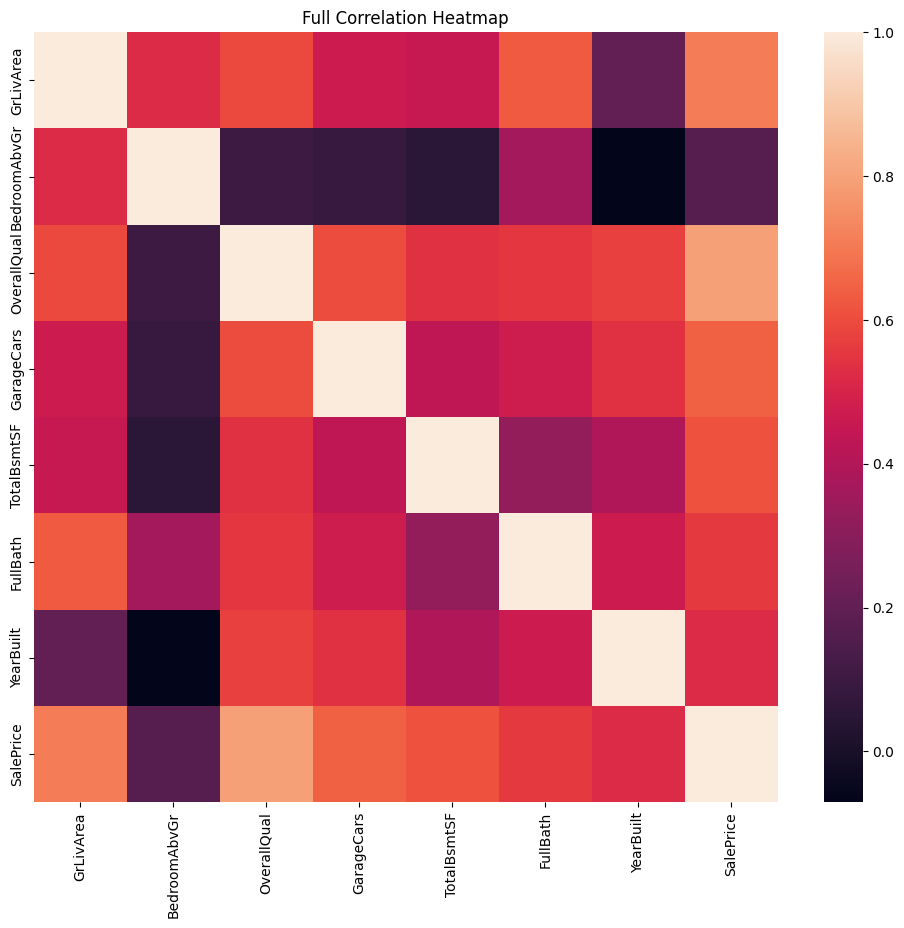

In [18]:
# Plot heatmap
numeric_df = df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=False)
plt.title("Full Correlation Heatmap")
plt.show()

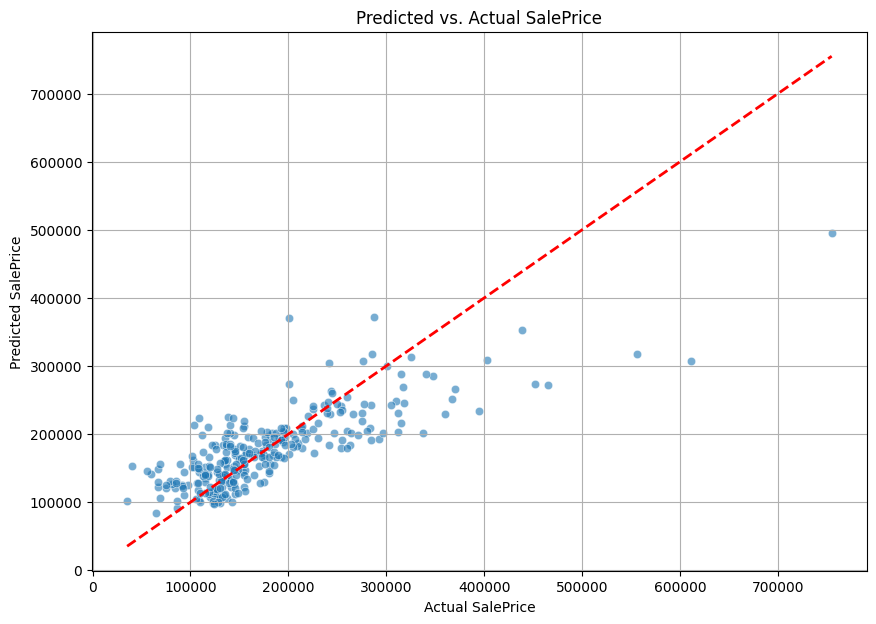

In [31]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Diagonal line for perfect prediction
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Predicted vs. Actual SalePrice")
plt.grid(True)
plt.show()

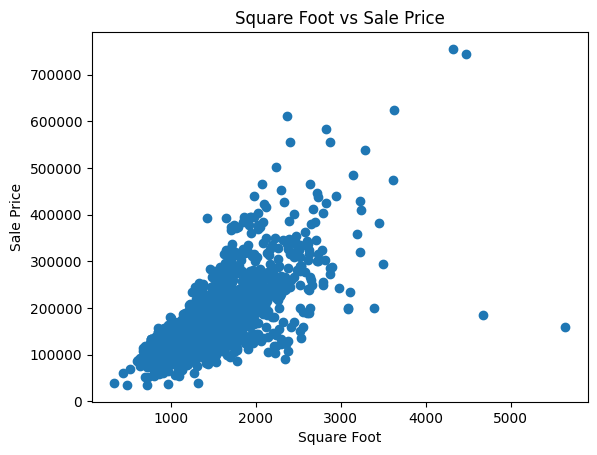

In [32]:
plt.figure()
plt.scatter(df["GrLivArea"], df["SalePrice"])
plt.xlabel("Square Foot")
plt.ylabel("Sale Price")
plt.title("Square Foot vs Sale Price")
plt.show()